# Import functions

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MonthLocator

# Geospatial
import folium
import geopandas as gpd
from bs4 import BeautifulSoup


# Import other python script functions

In [6]:
from scripts.data_cleaning import clean_raw_data
from scripts.clean_planning_area import format_geojson_planning_area

# Import datasets

In [10]:
# Import resale flat price data
df_raw = pd.read_csv('data/raw_data/resale_flat_prices.csv')

# Import raw planning area file
gdf = gpd.read_file('data/raw_data/geographical_shape_file/MasterPlan2019PlanningAreaBoundaryNoSea.geojson', driver = 'GeoJSON')

# Clean Datasets

In [11]:
resale_prices_clean = clean_raw_data(df_raw)
sg_planning_area = format_geojson_planning_area(gdf)

In [12]:
df_clean.to_csv('data/processed_data/resale_prices_clean.csv', header = True, index = False)

In [ ]:
sg_planning_area.to_csv('data/processed_data/sg_planning_area.csv', header = True, index = False)

In [ ]:
# Import mall_coordinates
mall_coordinates = pd.read_csv('data/raw_data/amenities_locations/mall_coordinates.csv')

# EDA

In [66]:
# average resale price on flat_type and town
avg_resale_price_aggregates = df_raw.groupby(['flat_type', 'town']).agg(avg_resale_price = ('resale_price', 'mean')).reset_index()

,flat_type,town,avg_resale_price
0,1 ROOM,BUKIT MERAH,197647.677419
1,2 ROOM,ANG MO KIO,237506.163934
2,2 ROOM,BEDOK,241325.728070
3,2 ROOM,BUKIT BATOK,335120.000000
4,2 ROOM,BUKIT MERAH,270650.447917
...,...,...,...
126,EXECUTIVE,WOODLANDS,668651.103181
127,EXECUTIVE,YISHUN,654459.690128
128,MULTI-GENERATION,BISHAN,908171.636364
129,MULTI-GENERATION,TAMPINES,804299.478261


In [2]:
unique_flat_type = list(df_clean.flat_type.unique())
unique_flat_type

# for flat_type in unique_flat_type:
#     df = avg_resale_price_aggregates.loc[df_clean['flat_type'] == flat_type]
    
#     # Set the style of seaborn for better aesthetics
#     sns.set(style="whitegrid")

#     # Create a barplot
#     plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
#     sns.barplot(x='town', y='avg_resale_price', data=df, order=df.sort_values('avg_resale_price', ascending=False)['town'], palette='viridis')

#     # Set labels and title
#     plt.xlabel('Town')
#     plt.ylabel('Resale Price')
#     plt.title(f'{flat_type} - Barplot of Resale Price by Town')
#     plt.xticks(rotation=90)

#     # Show the plot
#     plt.show()

NameError: name 'df_clean' is not defined

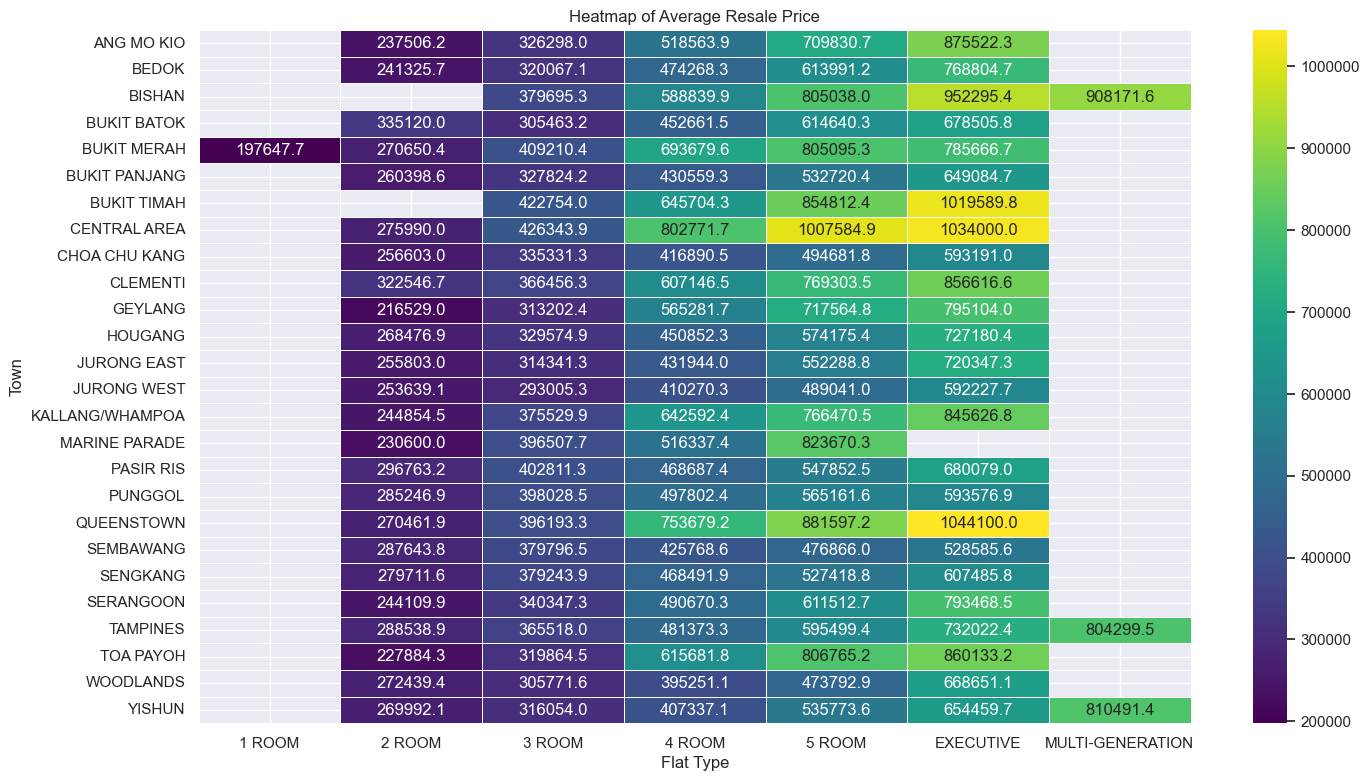

In [69]:
# Pivot the DataFrame for the heatmap
heatmap_data = avg_resale_price_aggregates.pivot_table(index='town', columns='flat_type', values='avg_resale_price')

# Set the style of seaborn for better aesthetics
sns.set()

# Create a heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f", linewidths=.5, cbar_kws={'format': '%.0f'})

# Set labels and title
plt.xlabel('Flat Type')
plt.ylabel('Town')
plt.title('Heatmap of Average Resale Price')

# Show the plot
plt.show()

In [6]:
# Create SG Map
m = folium.Map(location=[1.3521, 103.8198], zoom_start=11, tiles="CartoDB positron")
m

for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    folium.Popup(r["PLN_AREA_N"]).add_to(geo_j)
    geo_j.add_to(m)
m